In [17]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import requests
from PIL import Image
import pandas as pd
import pickle
from sklearn import datasets, preprocessing,cross_validation, feature_extraction
from sklearn import linear_model, svm, metrics, ensemble, tree, ensemble
from sklearn.decomposition import PCA
from sklearn.metrics import log_loss
import pandas as pd
import urllib
import csv
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import log_loss
import warnings
from collections import Counter
warnings.filterwarnings("ignore")


In [3]:
# dimensions of our images.
img_width, img_height = 350, 350
top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'sorted_set'

nb_train_samples = 745

epochs = 50
batch_size = 1
def save_bottlebeck_features():
   
    
    #Function to compute VGG-16 CNN for image feature extraction.
    train_target = []
    
    datagen = ImageDataGenerator(rescale=1. / 255)
    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')
    generator_train = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    
    for i in generator_train.filenames:
        train_target.append(i[2:-5])
      

    bottleneck_features_train = model.predict_generator(generator_train, nb_train_samples // batch_size)
   
    bottleneck_features_train =  bottleneck_features_train.reshape(745,51200)
    
   
    np.save(open('train_cnn_features.npy', 'wb'), bottleneck_features_train)
    np.save(open('train_cnn_feature_labels.npy', 'wb'), np.array(train_target))
     
   
        

save_bottlebeck_features()


"# dimensions of our images.\nimg_width, img_height = 350, 350\ntop_model_weights_path = 'bottleneck_fc_model.h5'\ntrain_data_dir = 'sorted_set'\n\nnb_train_samples = 745\n\nepochs = 50\nbatch_size = 1\ndef save_bottlebeck_features():\n   \n    \n    #Function to compute VGG-16 CNN for image feature extraction.\n    train_target = []\n    \n    datagen = ImageDataGenerator(rescale=1. / 255)\n    # build the VGG16 network\n    model = applications.VGG16(include_top=False, weights='imagenet')\n    generator_train = datagen.flow_from_directory(\n        train_data_dir,\n        target_size=(img_width, img_height),\n        batch_size=batch_size,\n        class_mode=None,\n        shuffle=False)\n    \n    for i in generator_train.filenames:\n        train_target.append(i[2:-5])\n      \n\n    bottleneck_features_train = model.predict_generator(generator_train, nb_train_samples // batch_size)\n   \n    bottleneck_features_train =  bottleneck_features_train.reshape(745,51200)\n    \n   \n  

In [5]:
bottleneck_features_train = np.load('train_cnn_features.npy')

In [6]:
print(bottleneck_features_train.shape)


(745, 51200)


In [7]:
data = np.load('train_cnn_features.npy')
target = np.load('train_cnn_feature_labels.npy')

In [104]:
data_y = [target[i].split('\\')[0] for i in range(target.shape[0])]
label_encoder = preprocessing.LabelEncoder()
data_y= label_encoder.fit_transform(data_y)
print(type(data_y))
print(Counter(data_y))

<class 'numpy.ndarray'>
Counter({4: 293, 6: 111, 3: 108, 1: 102, 0: 52, 5: 46, 2: 33})


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, data_y, stratify=data_y, test_size=0.2)


In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    labels = [1,2,3,4,5,6,7]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

OrderedDict([(0, 52), (1, 102), (2, 33), (3, 108), (4, 293), (5, 46), (6, 111)])


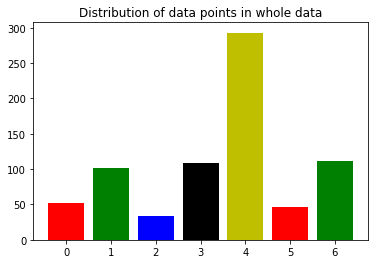

OrderedDict([(0, 42), (1, 82), (2, 26), (3, 86), (4, 234), (5, 37), (6, 89)])


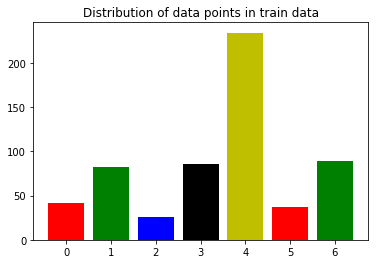

OrderedDict([(0, 10), (1, 20), (2, 7), (3, 22), (4, 59), (5, 9), (6, 22)])


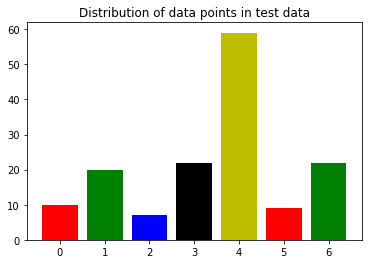

In [29]:
from collections import Counter, OrderedDict
D = dict(Counter(data_y))
OD = OrderedDict(sorted(D.items()))
print(OD)
my_colors = 'rgbky'
plt.bar(range(len(OD)), OD.values(), align='center', color=my_colors)
plt.xticks(range(len(OD)), list(OD.keys()))
plt.title('Distribution of data points in whole data')
plt.show()

D = dict(Counter(y_train))
OD = OrderedDict(sorted(D.items()))
print(OD)
my_colors = 'rgbky'
plt.bar(range(len(OD)), OD.values(), align='center', color=my_colors)
plt.xticks(range(len(OD)), list(OD.keys()))
plt.title('Distribution of data points in train data')
plt.show()

D = dict(Counter(y_test))
OD = OrderedDict(sorted(D.items()))
print(OD)
my_colors = 'rgbky'
plt.bar(range(len(OD)), OD.values(), align='center', color=my_colors)
plt.xticks(range(len(OD)), list(OD.keys()))
plt.title('Distribution of data points in test data')
plt.show() 

For values of alpha =  1e-05 The log loss is: 1.04852150362
For values of alpha =  0.0001 The log loss is: 1.0659543055
For values of alpha =  0.001 The log loss is: 1.07982984385
For values of alpha =  0.01 The log loss is: 1.05451036287
For values of alpha =  0.1 The log loss is: 1.04829848173
For values of alpha =  1 The log loss is: 1.03860766325
For values of alpha =  10 The log loss is: 1.20936703407


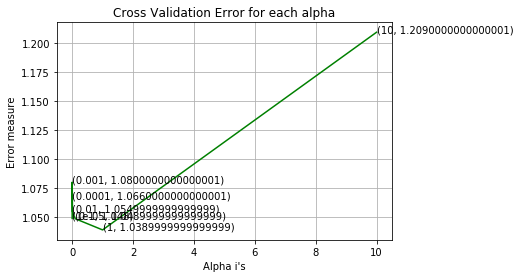

For values of best alpha =  1 The train log loss is: 0.731067517058
For values of best alpha =  1 The test log loss is: 1.03860766325
-------------------------------------------------- Confusion matrix --------------------------------------------------


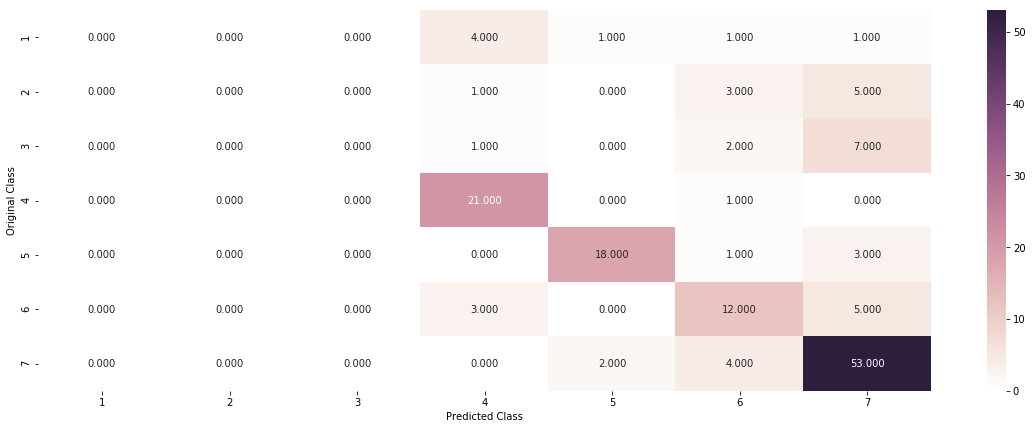

In [12]:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    # this is lr..
    clf.fit(x_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    predict_y = sig_clf.predict_proba(x_test)
    cv_log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(x_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train, y_train)

predict_y = sig_clf.predict_proba(x_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
plot_confusion_matrix(y_test,sig_clf.predict(x_test))

For values of alpha =  1e-05 The log loss is: 1.10243747705
For values of alpha =  0.0001 The log loss is: 1.10752523425
For values of alpha =  0.001 The log loss is: 1.08248317122
For values of alpha =  0.01 The log loss is: 1.07430928228
For values of alpha =  0.1 The log loss is: 1.06488550312
For values of alpha =  1 The log loss is: 1.06552541098
For values of alpha =  10 The log loss is: 1.10489801051


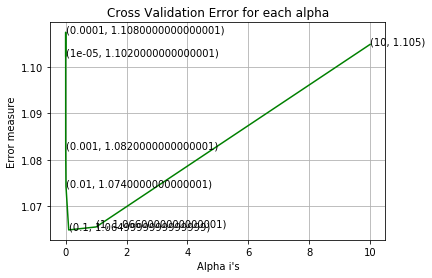

For values of best alpha =  0.1 The train log loss is: 0.739840148914
For values of best alpha =  0.1 The test log loss is: 1.06488550312
-------------------------------------------------- Confusion matrix --------------------------------------------------


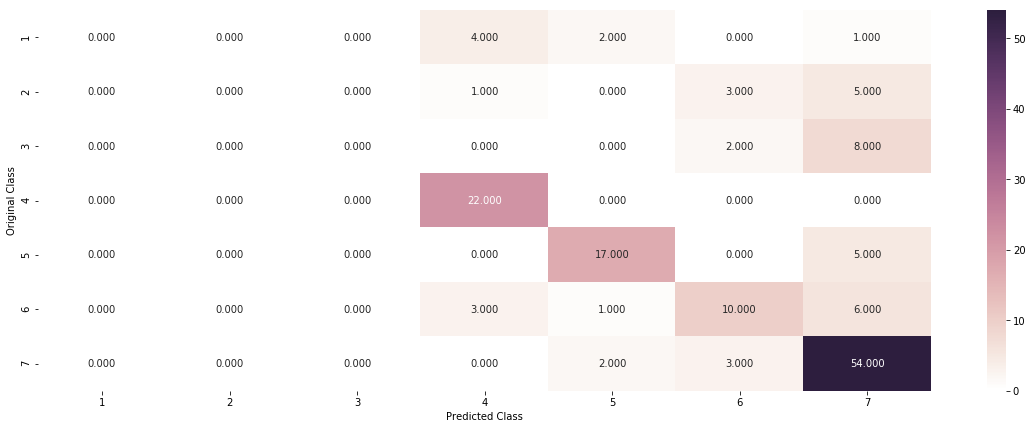

In [13]:

alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    # this is svm
    clf.fit(x_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    predict_y = sig_clf.predict_proba(x_test)
    cv_log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(x_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train, y_train)

predict_y = sig_clf.predict_proba(x_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
plot_confusion_matrix(y_test,sig_clf.predict(x_test))

For values of alpha =  1e-05 The log loss is: 1.34678290079
For values of alpha =  0.0001 The log loss is: 1.43786794983
For values of alpha =  0.001 The log loss is: 1.12591096024
For values of alpha =  0.01 The log loss is: 1.03051264212
For values of alpha =  0.1 The log loss is: 1.01381443364
For values of alpha =  1 The log loss is: 1.01381443364
For values of alpha =  10 The log loss is: 1.01381443364


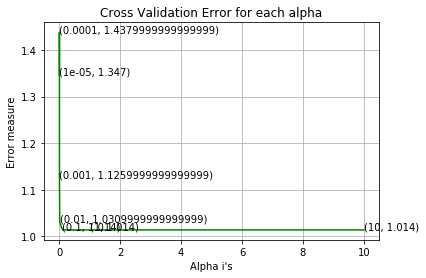

For values of best alpha =  0.1 The train log loss is: 0.63556326605
For values of best alpha =  0.1 The test log loss is: 1.01381443364
-------------------------------------------------- Confusion matrix --------------------------------------------------


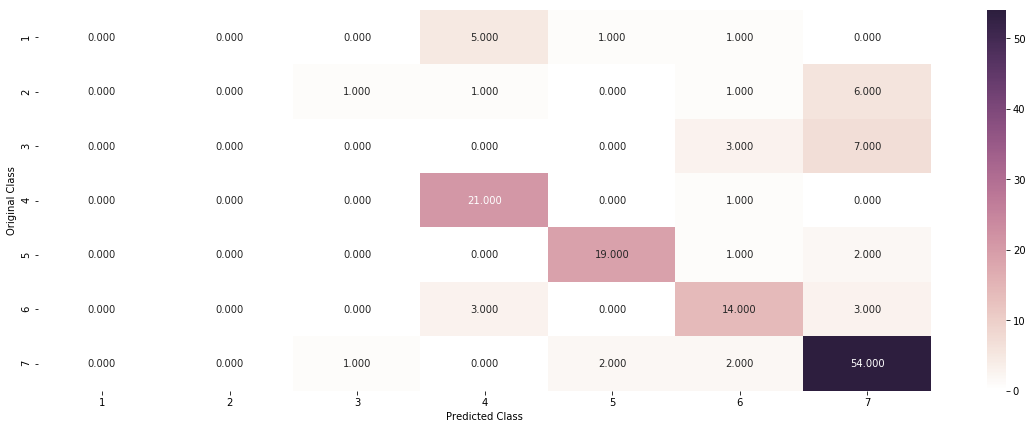

In [14]:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
cv_log_error_array=[]
for i in alpha:
    clf = svm.SVC(kernel='linear',class_weight="balanced", probability=True, random_state=42, C=i)
    clf.fit(x_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    predict_y = sig_clf.predict_proba(x_test)
    cv_log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = svm.SVC(kernel='linear',class_weight="balanced",probability=True, random_state=42, C=alpha[best_alpha])
clf.fit(x_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train, y_train)
#
predict_y = sig_clf.predict_proba(x_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
plot_confusion_matrix(y_test,sig_clf.predict(x_test))

In [17]:
from sklearn.metrics import log_loss
rand_predicted_y = np.zeros((len(y_test),7))
for i in range(1,len(y_test)):
    rand_probs = np.random.rand(1,7)
    rand_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,rand_predicted_y, eps=1e-15))

Log loss on Test Data using Random Model 2.2872318425


In [47]:
import cv2
import glob
import random
import math
import numpy as np
import dlib
import itertools

from skimage.io import imread_collection

emotions = ["anger", "disgust", "fear", "happy", "neutral", "sadness", "surprise"] #Emotion list
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") 
data = {} 
def get_files(emotion):
    files = glob.glob("sorted_set\\%s\\*"%emotion)
    return files

def get_landmarks(image):
    detections = detector(image, 1)
    for k,d in enumerate(detections): #For all detected face instances individually
        shape = predictor(image, d) #Draw Facial Landmarks with the predictor class
        xlist = []
        ylist = []
        for i in range(1,68): #Store X and Y coordinates in two lists
            xlist.append(float(shape.part(i).x))
            ylist.append(float(shape.part(i).y))
            
        xmean = np.mean(xlist)
        ymean = np.mean(ylist)
        xcentral = [(x-xmean) for x in xlist]
        ycentral = [(y-ymean) for y in ylist]

        landmarks_vectorised = []
        for x, y, w, z in zip(xcentral, ycentral, xlist, ylist):
            landmarks_vectorised.append(w)
            landmarks_vectorised.append(z)
            meannp = np.asarray((ymean,xmean))
            coornp = np.asarray((z,w))
            dist = np.linalg.norm(coornp-meannp)
            landmarks_vectorised.append(dist)
            landmarks_vectorised.append((math.atan2(y, x)*360)/(2*math.pi))

        data['landmarks_vectorised'] = landmarks_vectorised
    if len(detections) < 1: 
        data['landmarks_vestorised'] = "error"

def make_sets():
    training_data = []
    training_labels = []
    
    for emotion in emotions:
        print(" working on %s" %emotion)
        training = get_files(emotion)
        for item in training:
                image = cv2.imread(item) #open image
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                clahe_image = clahe.apply(gray)
                get_landmarks(clahe_image)
                if data['landmarks_vectorised'] == "error":
                    print("no face detected on this one")
                else:
                    training_data.append(data['landmarks_vectorised']) #append image array to training data list
                    training_labels.append(emotions.index(emotion))


    np.save(open('train_lm_x.npy', 'wb'), np.array(training_data))
    np.save(open('train_lm_y.npy', 'wb'), np.array(training_labels))
    print(training_labels)
make_sets()    

 working on anger
 working on disgust
 working on fear
 working on happy
 working on neutral
 working on sadness
 working on surprise
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

In [105]:
training_labels = np.load('train_lm_y.npy')
training_labels.shape
Counter(training_labels)

Counter({0: 52, 1: 102, 2: 33, 3: 108, 4: 293, 5: 46, 6: 111})

In [9]:
data_lm = np.load('train_lm_x.npy')

In [10]:
data_lm.shape #these r lnmrk featuress

(745, 268)

In [11]:
data.shape

(745, 51200)

In [12]:
data_cn_lm = np.concatenate((data, data_lm), axis=1)

In [18]:
data_y.shape
Counter(data_y)

Counter({0: 52, 1: 102, 2: 33, 3: 108, 4: 293, 5: 46, 6: 111})

In [19]:
data_cn_lm.shape #all featuresss

(745, 51468)

In [20]:
data_cn_lm

array([[  4.02247578e-01,   0.00000000e+00,   0.00000000e+00, ...,
          2.81000000e+02,   4.35213874e+01,   1.13355975e+02],
       [  5.11110127e-01,   0.00000000e+00,   0.00000000e+00, ...,
          2.85000000e+02,   4.01378889e+01,   1.03943231e+02],
       [  5.14491379e-01,   0.00000000e+00,   0.00000000e+00, ...,
          2.88000000e+02,   4.42581106e+01,   1.03694141e+02],
       ..., 
       [  2.97273964e-01,   0.00000000e+00,   0.00000000e+00, ...,
          2.94000000e+02,   8.03978149e+01,   9.83903376e+01],
       [  2.49651015e-01,   0.00000000e+00,   0.00000000e+00, ...,
          2.95000000e+02,   8.25242358e+01,   9.65530416e+01],
       [  3.68706703e-01,   0.00000000e+00,   0.00000000e+00, ...,
          2.93000000e+02,   8.27378269e+01,   1.03818152e+02]])

In [22]:
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
data_cn_lm_std = standard_scaler.fit_transform(data_cn_lm)
data_cn_lm_std

array([[-0.23236061,  0.        , -0.22403703, ..., -0.95326777,
        -0.87122717,  1.51343762],
       [ 0.20614561,  0.        , -0.22403703, ..., -0.81171216,
        -1.09235411, -0.30442452],
       [ 0.21976554,  0.        , -0.22403703, ..., -0.70554545,
        -0.82307897, -0.35253066],
       ..., 
       [-0.65520192,  0.        , -0.22403703, ..., -0.49321204,
         1.53881429, -1.37684235],
       [-0.84703061,  0.        , -0.22403703, ..., -0.45782314,
         1.67778552, -1.73167522],
       [-0.36746568,  0.        , -0.22403703, ..., -0.52860094,
         1.69174466, -0.32858082]])

In [23]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_cn_lm_std, data_y, stratify=data_y, test_size=0.2)


OrderedDict([(0, 52), (1, 102), (2, 33), (3, 108), (4, 293), (5, 46), (6, 111)])


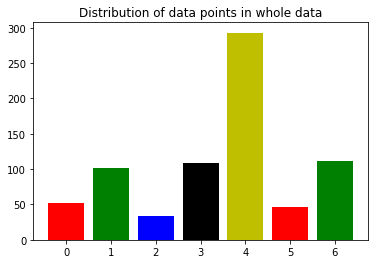

OrderedDict([(0, 42), (1, 82), (2, 26), (3, 86), (4, 234), (5, 37), (6, 89)])


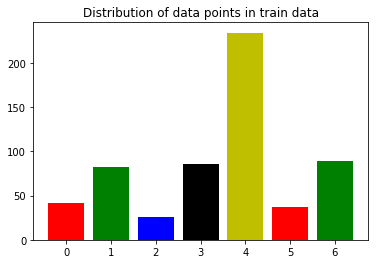

OrderedDict([(0, 10), (1, 20), (2, 7), (3, 22), (4, 59), (5, 9), (6, 22)])


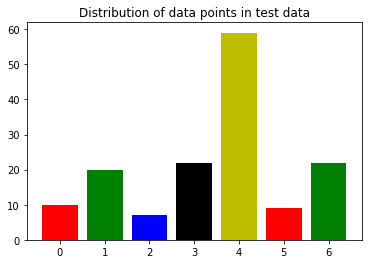

In [24]:
from collections import Counter, OrderedDict
D = dict(Counter(data_y))
OD = OrderedDict(sorted(D.items()))
print(OD)
my_colors = 'rgbky'
plt.bar(range(len(OD)), OD.values(), align='center', color=my_colors)
plt.xticks(range(len(OD)), list(OD.keys()))
plt.title('Distribution of data points in whole data')
plt.show()

D = dict(Counter(train_y))
OD = OrderedDict(sorted(D.items()))
print(OD)
my_colors = 'rgbky'
plt.bar(range(len(OD)), OD.values(), align='center', color=my_colors)
plt.xticks(range(len(OD)), list(OD.keys()))
plt.title('Distribution of data points in train data')
plt.show()

D = dict(Counter(test_y))
OD = OrderedDict(sorted(D.items()))
print(OD)
my_colors = 'rgbky'
plt.bar(range(len(OD)), OD.values(), align='center', color=my_colors)
plt.xticks(range(len(OD)), list(OD.keys()))
plt.title('Distribution of data points in test data')
plt.show() 